# Heart Disease Prediction using Maching Learning 

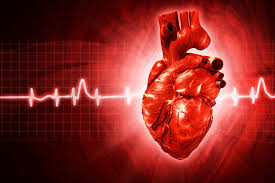

# Project Obejctive
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [1]:
#Multiple Model Test: Best Model Save(Best Score)

# Step1: Import Required Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# Step 2: Loading Data 

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3: Understanding Data using EDA 

###### 3.1 Data Head

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

###### 3.2: Data Tail

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

###### 3.3: Data Shape

In [6]:
df.shape

(303, 14)

###### 3.4: Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### 3.5: Data Columns

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6: Column DESC
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [9]:
#Domain Knowledge is required for this level of project

###### 3.7: Checking Null Counts

In [10]:
df.isna().sum()
#no null values found
# in case  of Null : Remove, Fill, Replace, Drop

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8: Columns Stats

In [11]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

###### 3.9: Each Column Univariate   Analysis

In [12]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('___________________________',end='\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
___________________________

Column_sex [1 0]
___________________________

Column_cp [3 2 1 0]
___________________________

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
___________________________

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305

###### 3.10: Each Numerical Feature Hist Plot Distribution

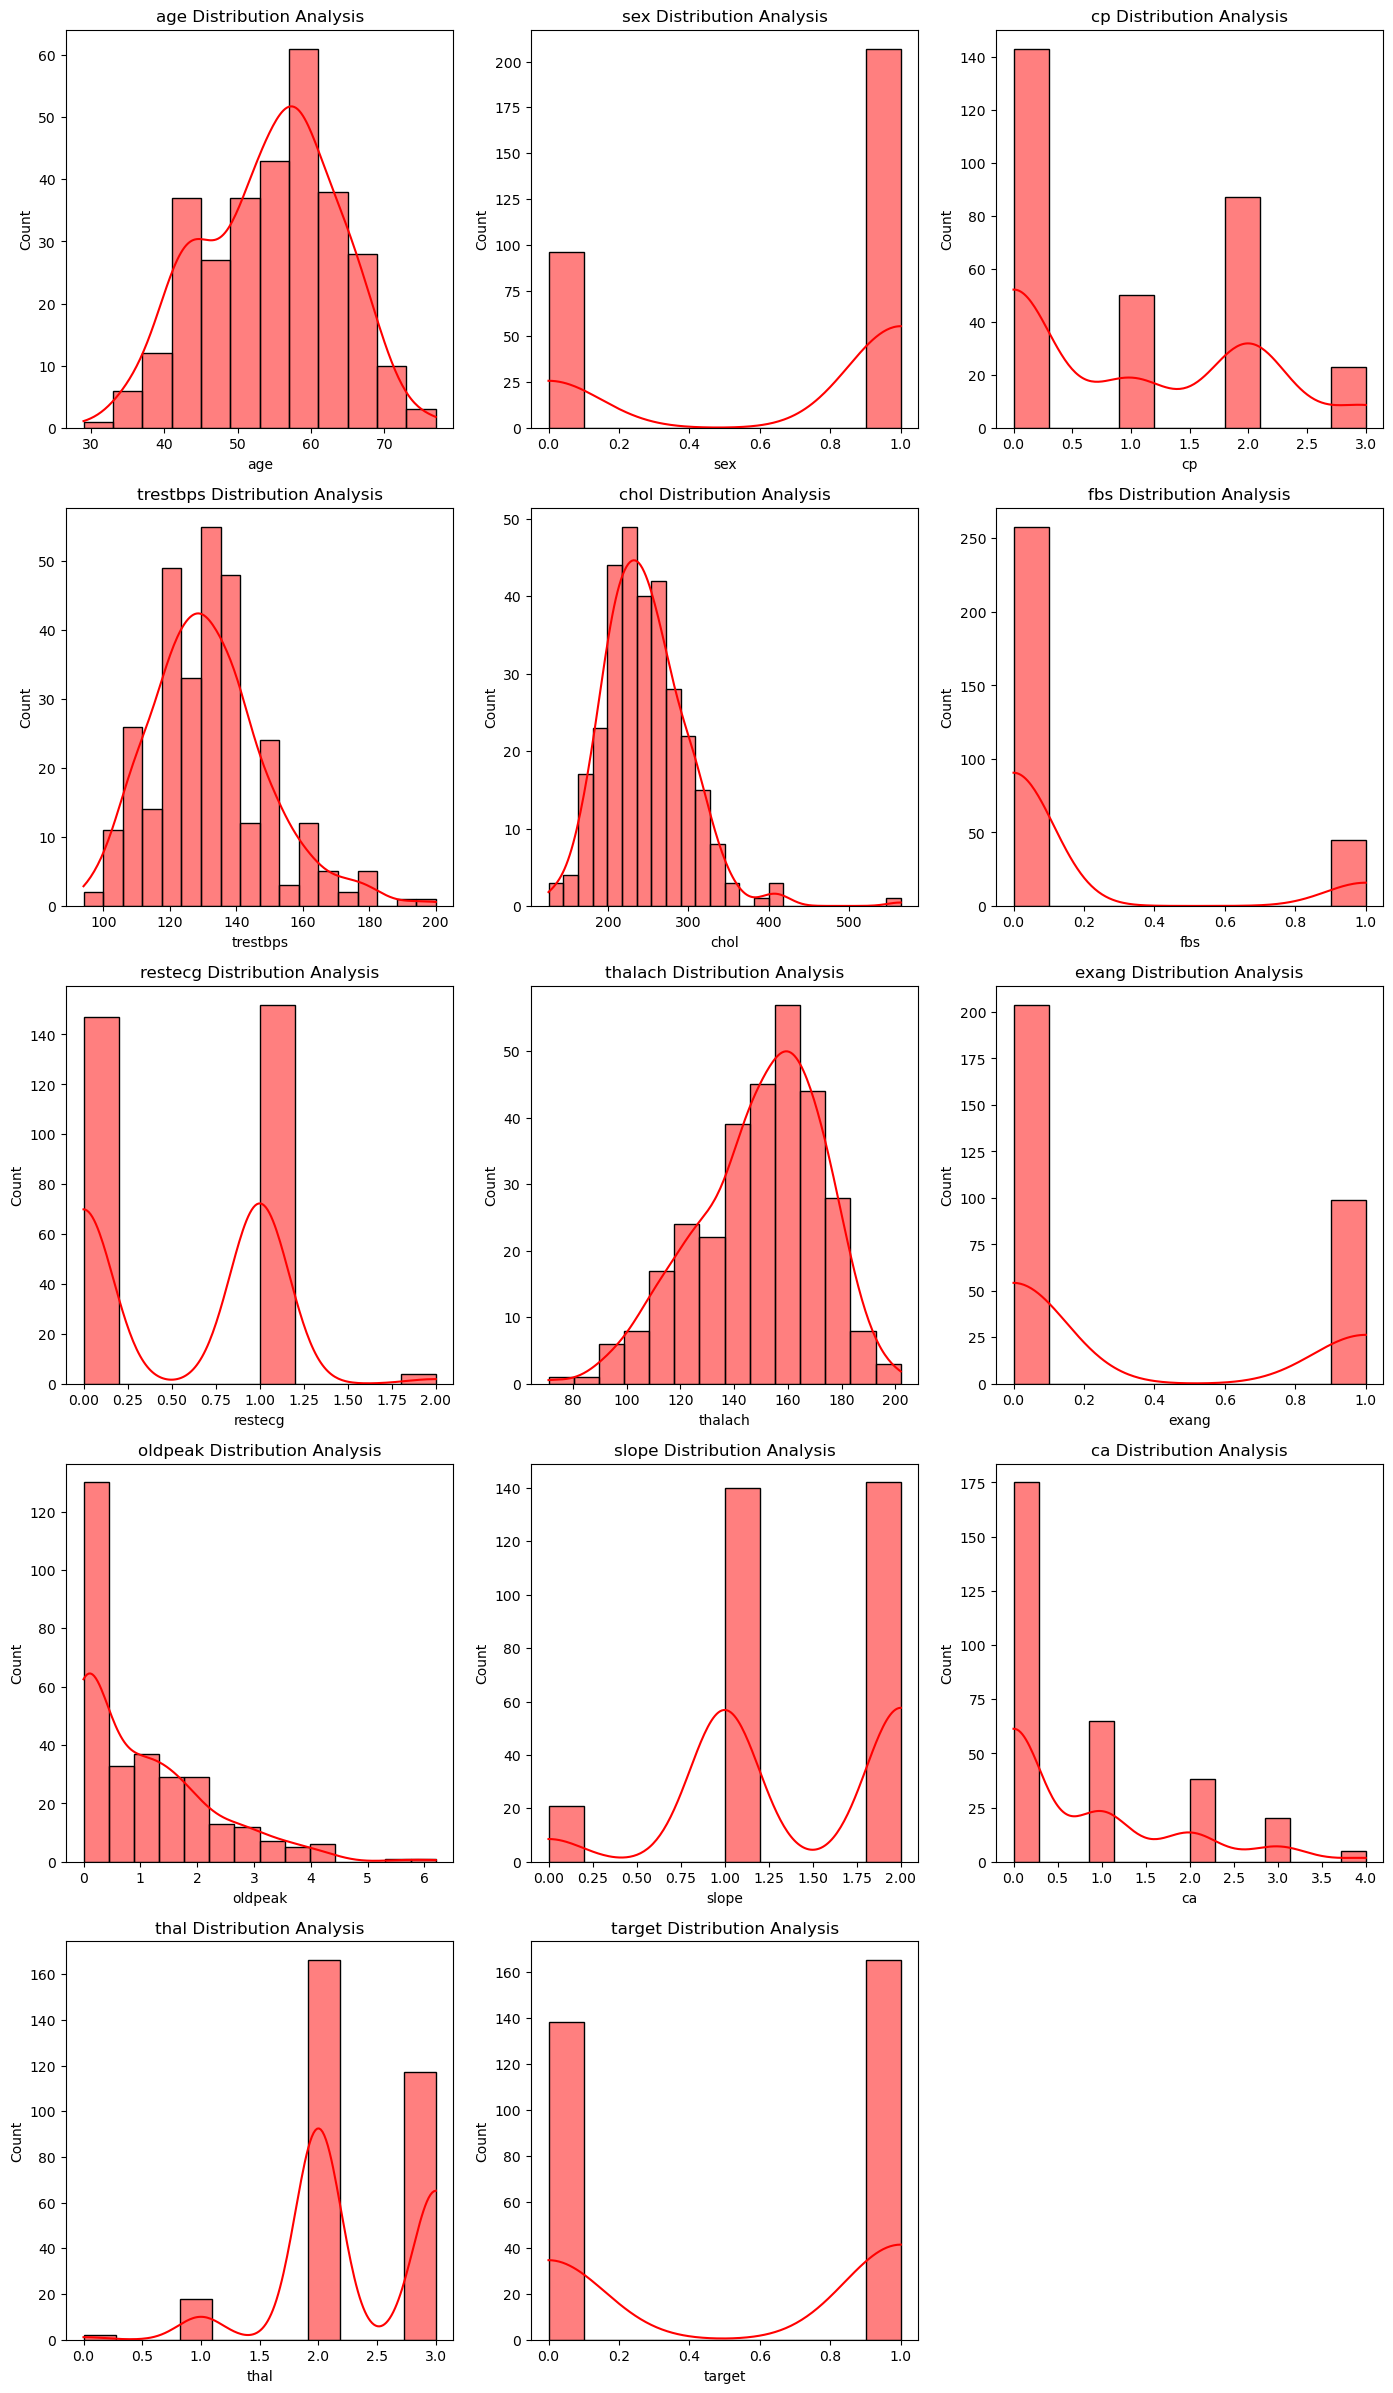

In [13]:
r= 5
c=3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis')
    sns.histplot(df[j],kde=True,color='r')
plt.savefig('All Nmuerical Analysis.jpeg',dpi=500)
plt.show()


In [14]:
#Target col not that much Imbalance, we can proceed , if Imbalance found we need to Balance using Sampling

###### 3.11: Bivariate Analysis, To Check Correlation of Feature VS Target

<function matplotlib.pyplot.show(close=None, block=None)>

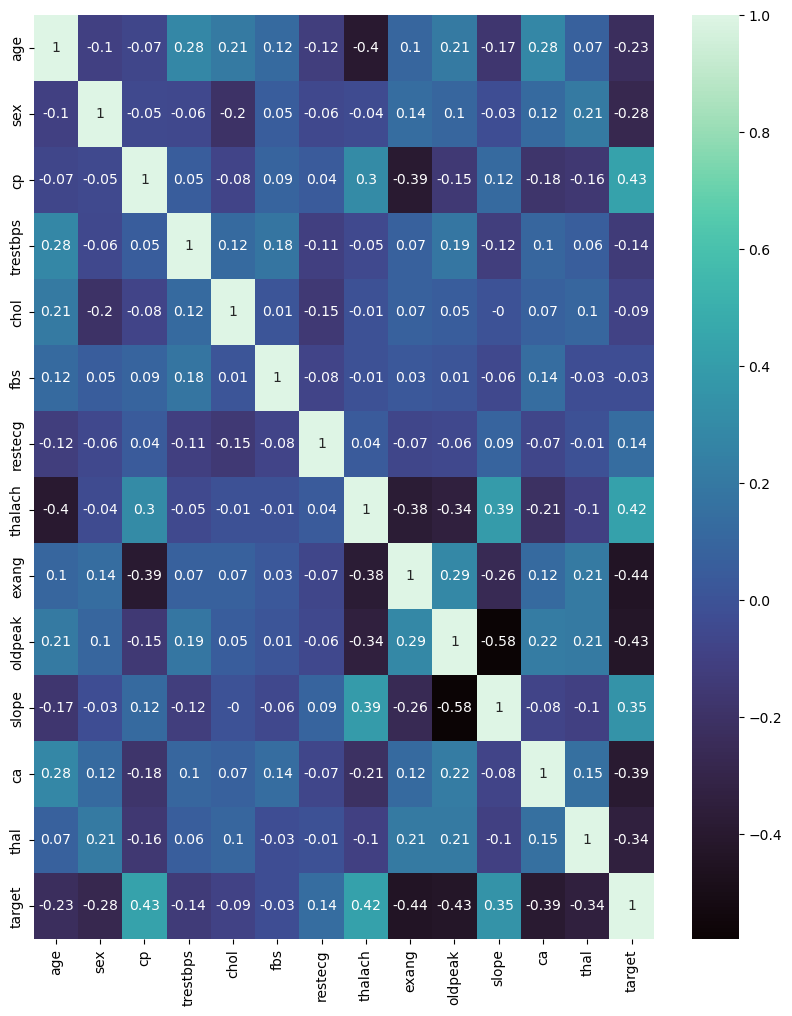

In [15]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot=True)
plt.show

In [16]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [17]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

In [18]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

###### 3.12 Target VS Feature

In [19]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

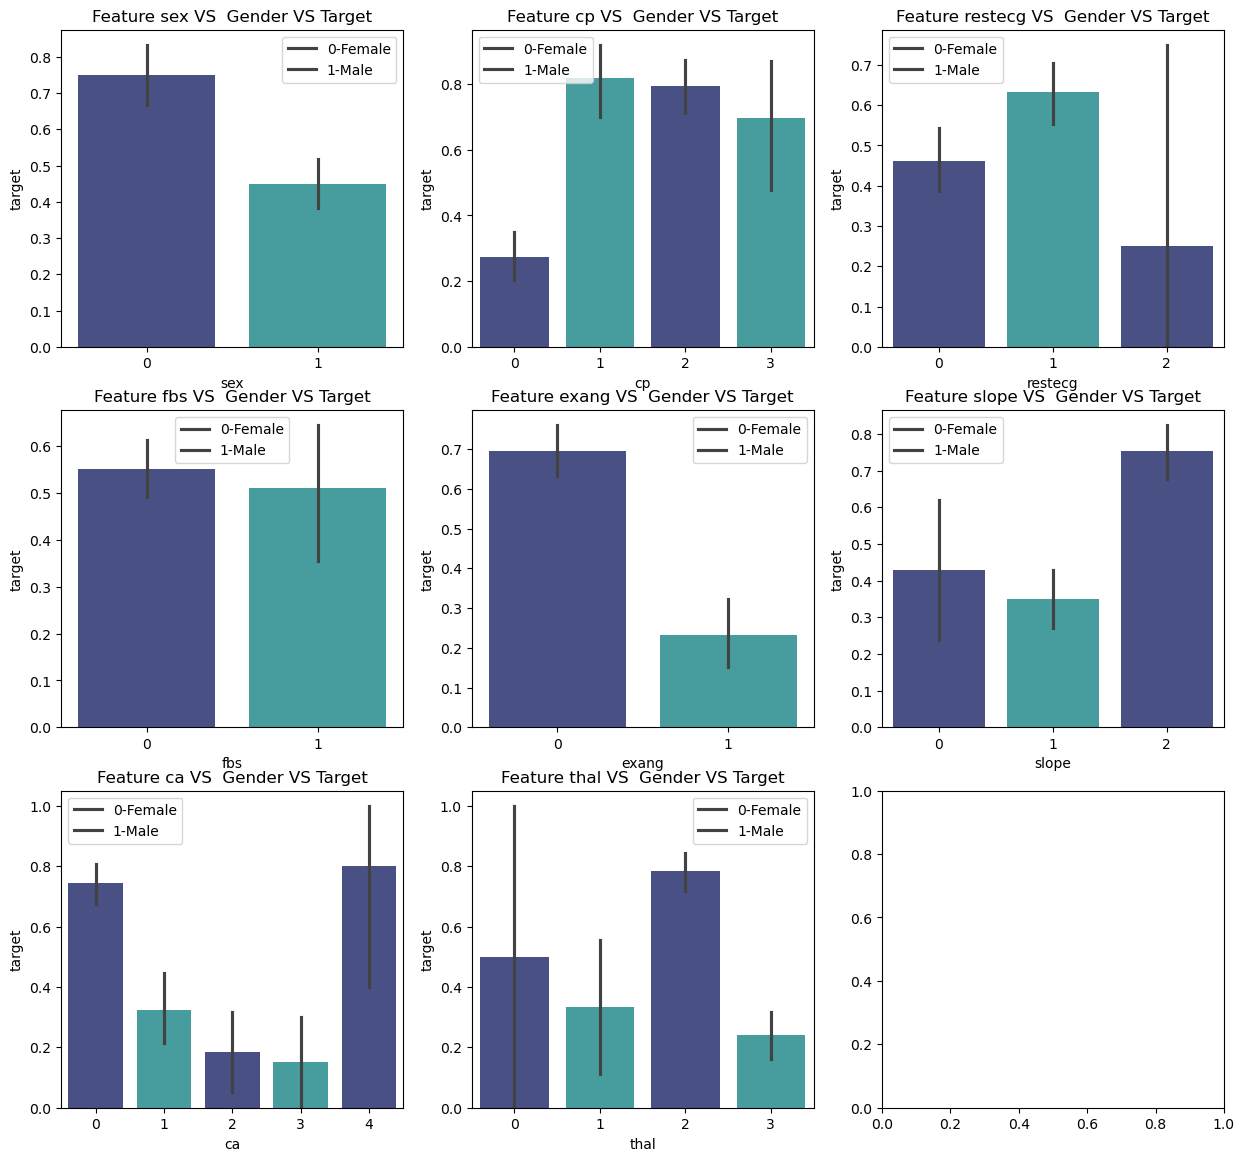

In [21]:
r=3
c=3
x_col=['sex','cp','restecg','fbs','exang','slope','ca','thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} VS  Gender VS Target')
        sns.barplot(data=df,x=x_col[i],y='target',palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        pass
plt.show()

######  3.13 Pairplot Feature VS Target

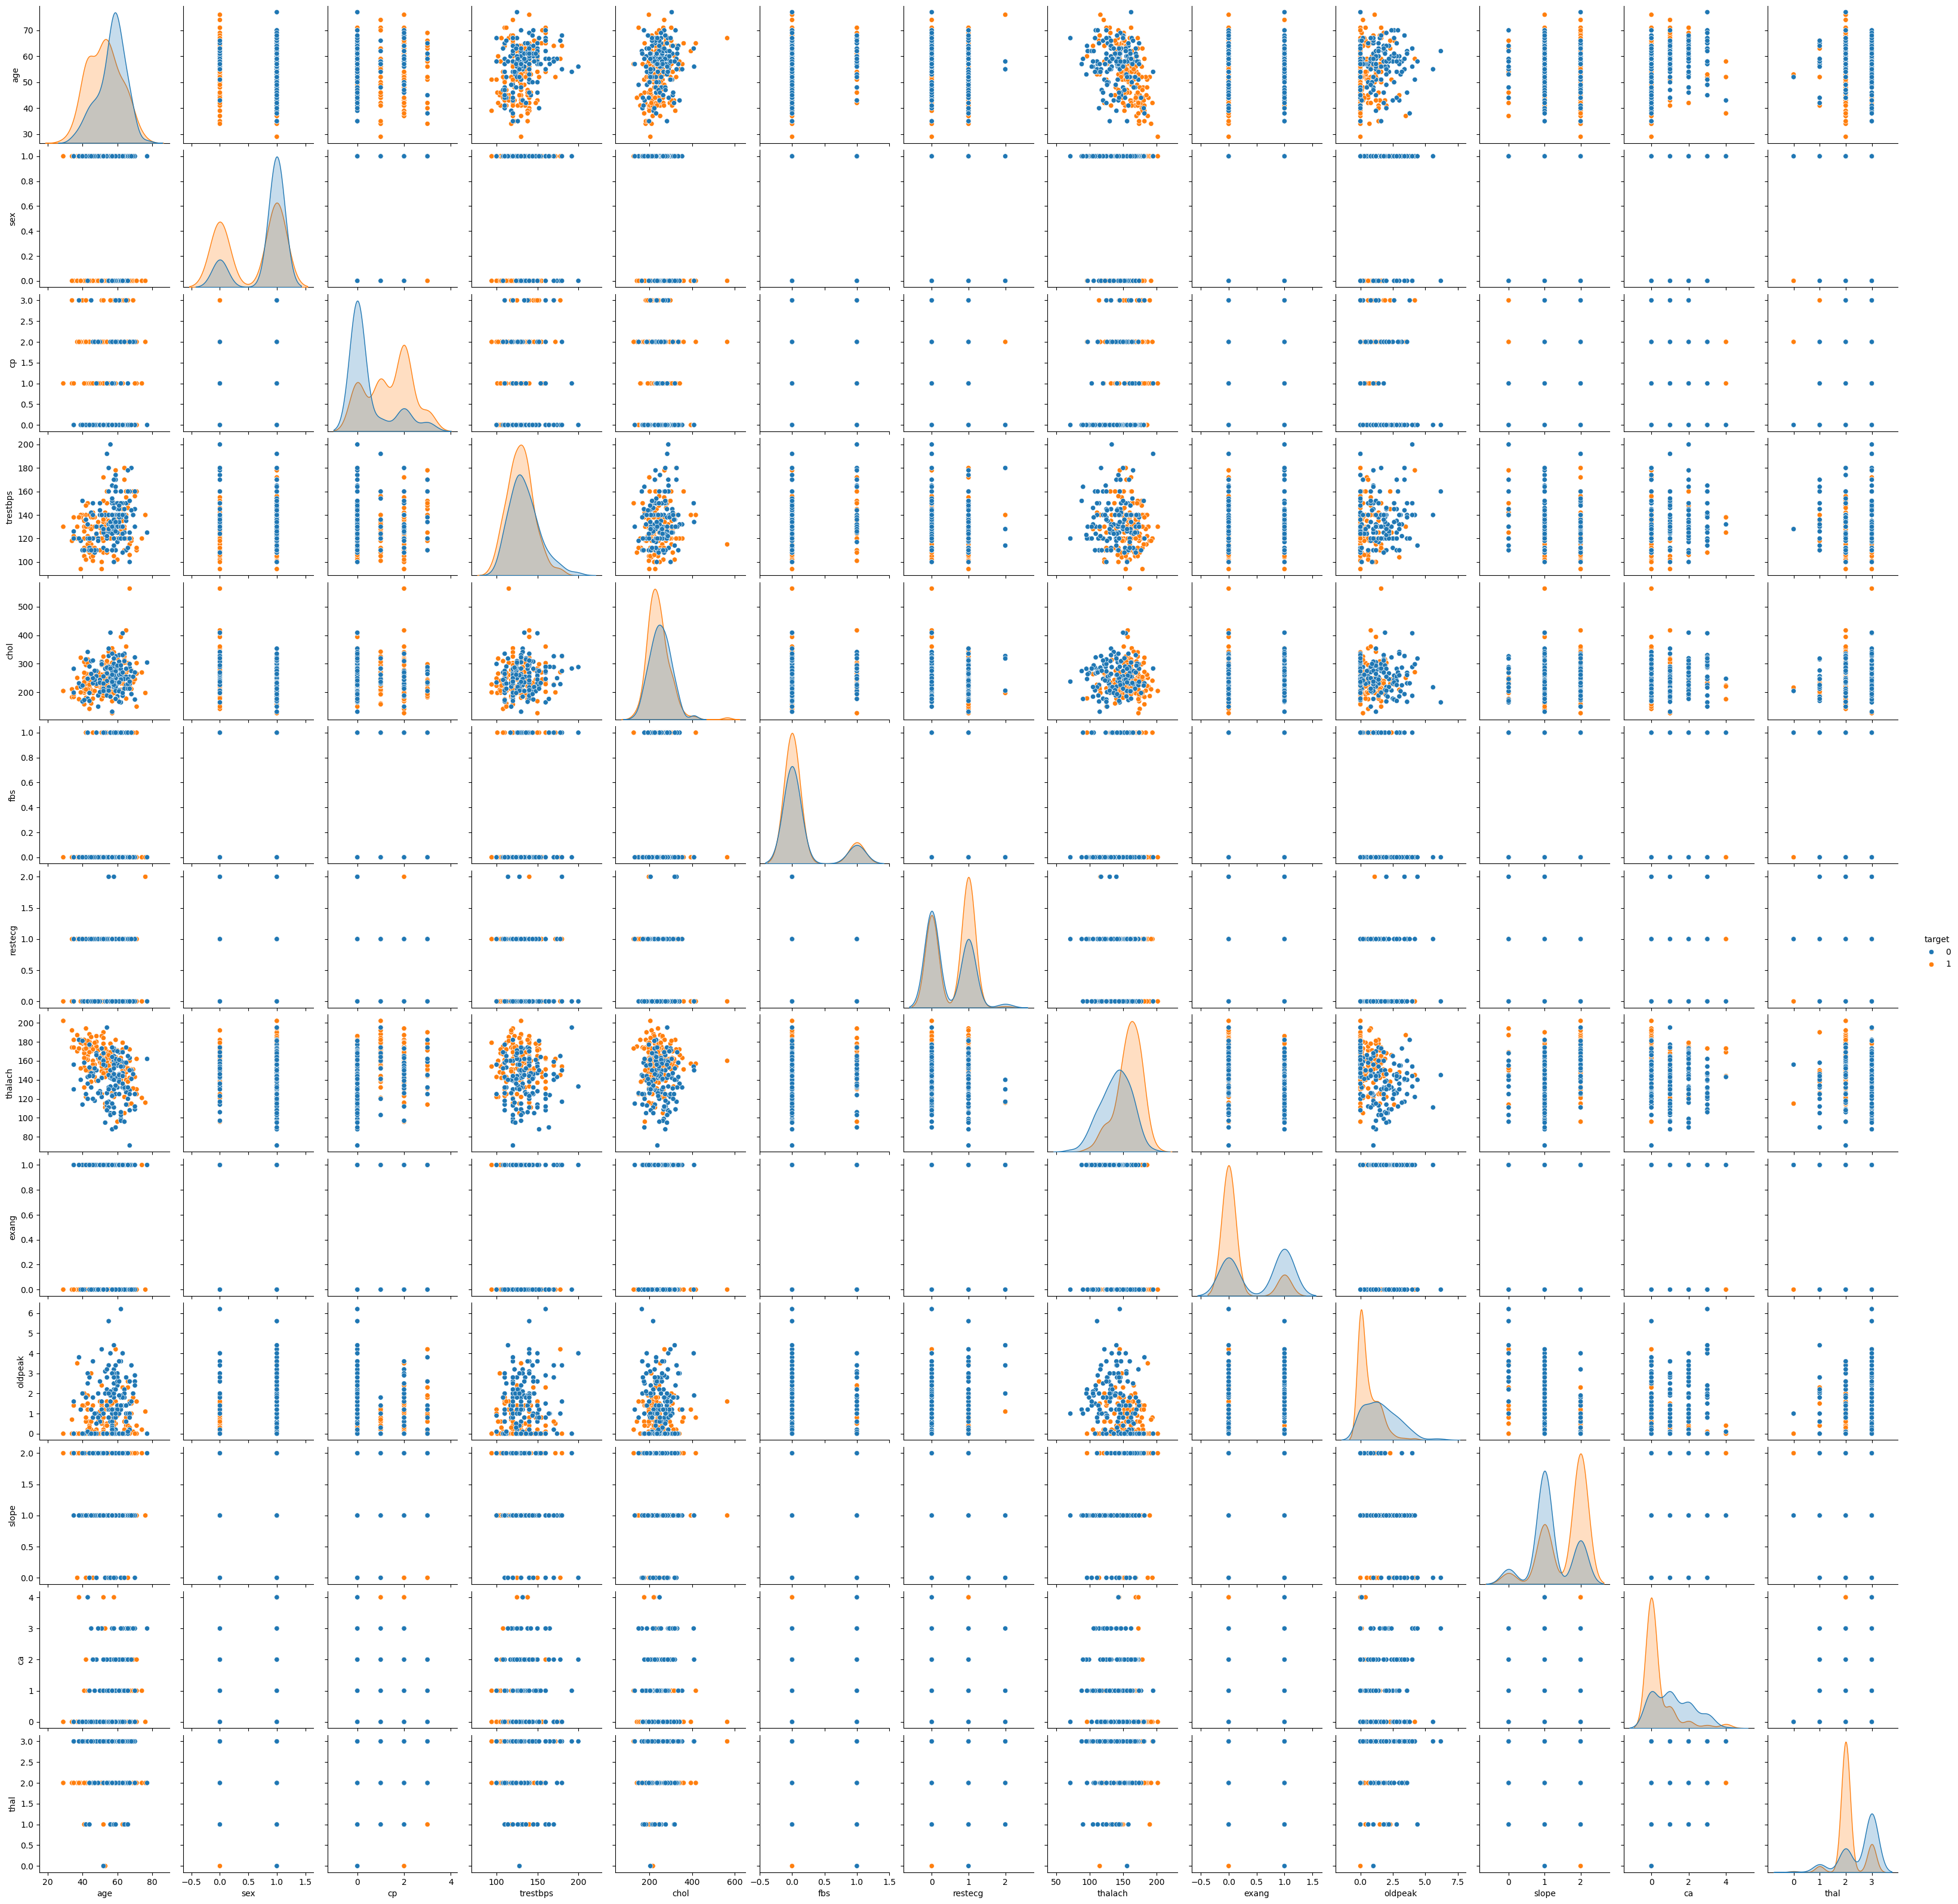

In [22]:
sns.pairplot(data=df,hue ='target')#it will take time to run
plt.show()

# Step 4: Divide Data into Train and Test

### Train Test Split

###### 4.1 Divide data into Target and Features

In [23]:
X = df.iloc[:,:-1]
y = df['target']

In [24]:
X.shape, y.shape

((303, 13), (303,))

######  4.2 Train - test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step5: Multi Model Creation 

In [27]:
#beacuse 

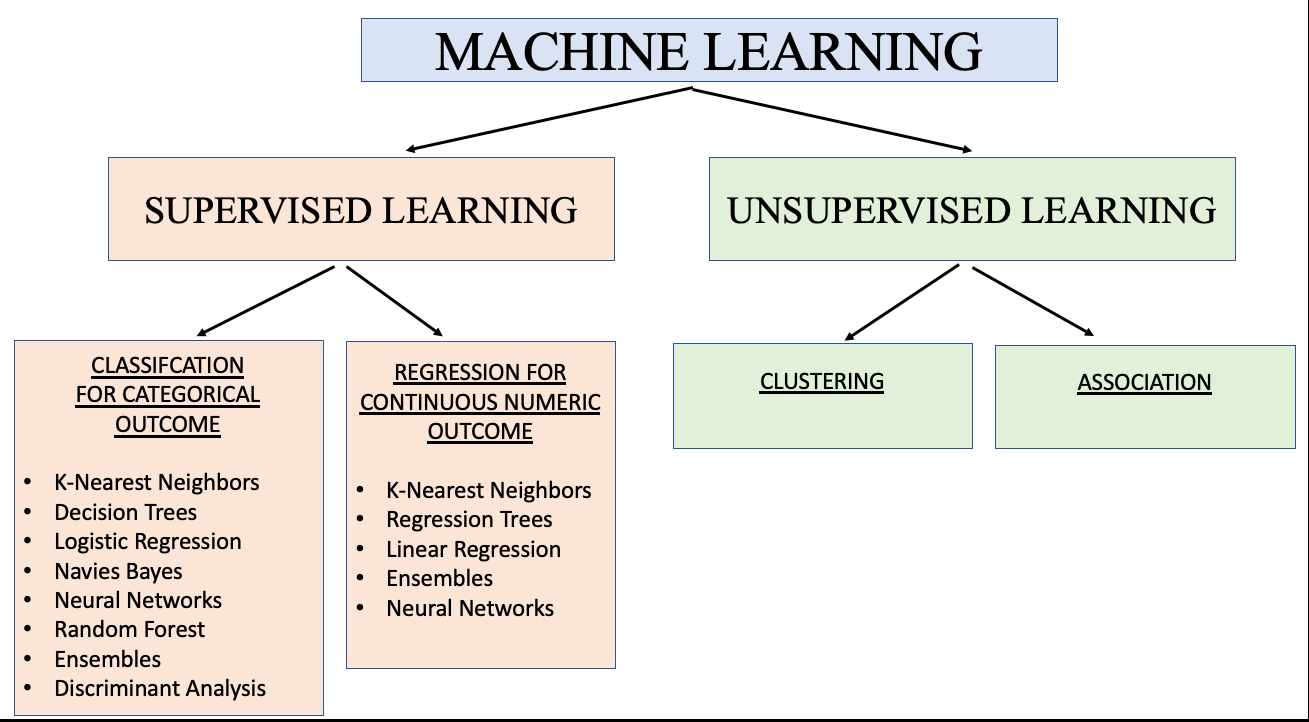

### Step 5.1: Logistic Regression Model

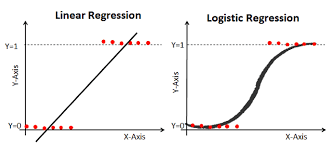

In [28]:
#It uses the concept of Sigmoid Func:Linear Points converted to Sigmoid(s) curve

In [29]:
#yPred=mx+c

In [30]:
#z= y_pred
#y_pred= Linear Regression
#Sigmoid Func convert Linear Line s curve
#Logistic Regression

In [31]:
#Logistic Regression : we can Solve Binary  and Multiclass classification

######  5.1.1: Import Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()#Model Object
model_lr.fit(X_train,y_train)#Training/Model Building:#Learn pattern in this step

LogisticRegression()

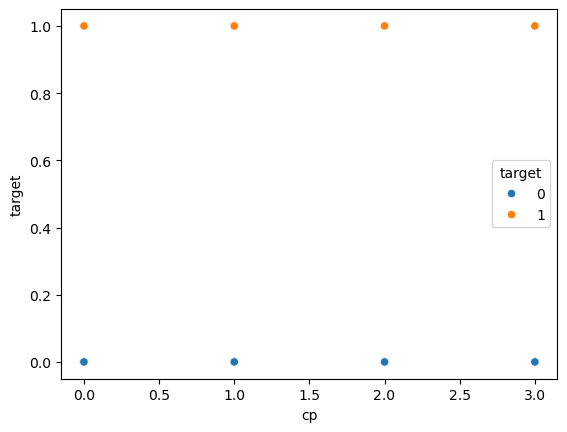

In [33]:
sns.scatterplot(data=df,x='cp',y='target',hue='target')
plt.show()

In [34]:
y_pred=model_lr.predict(X_test)
#y_pred

###### 5.1.2: Import Model Evaluation Metrics

In [35]:
#It will be called only when problem is of classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

###### 5.1.3: Import Confusion Matrix to Evaluate Classification

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
#Error:comparison:if Score tie
#Type 1, Type 2: Type 1 Error danger

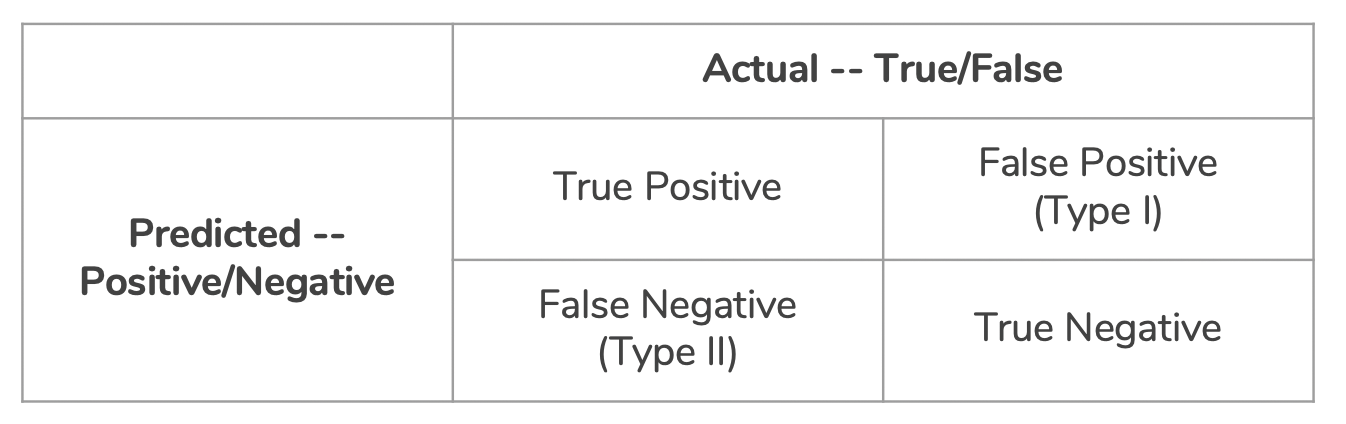

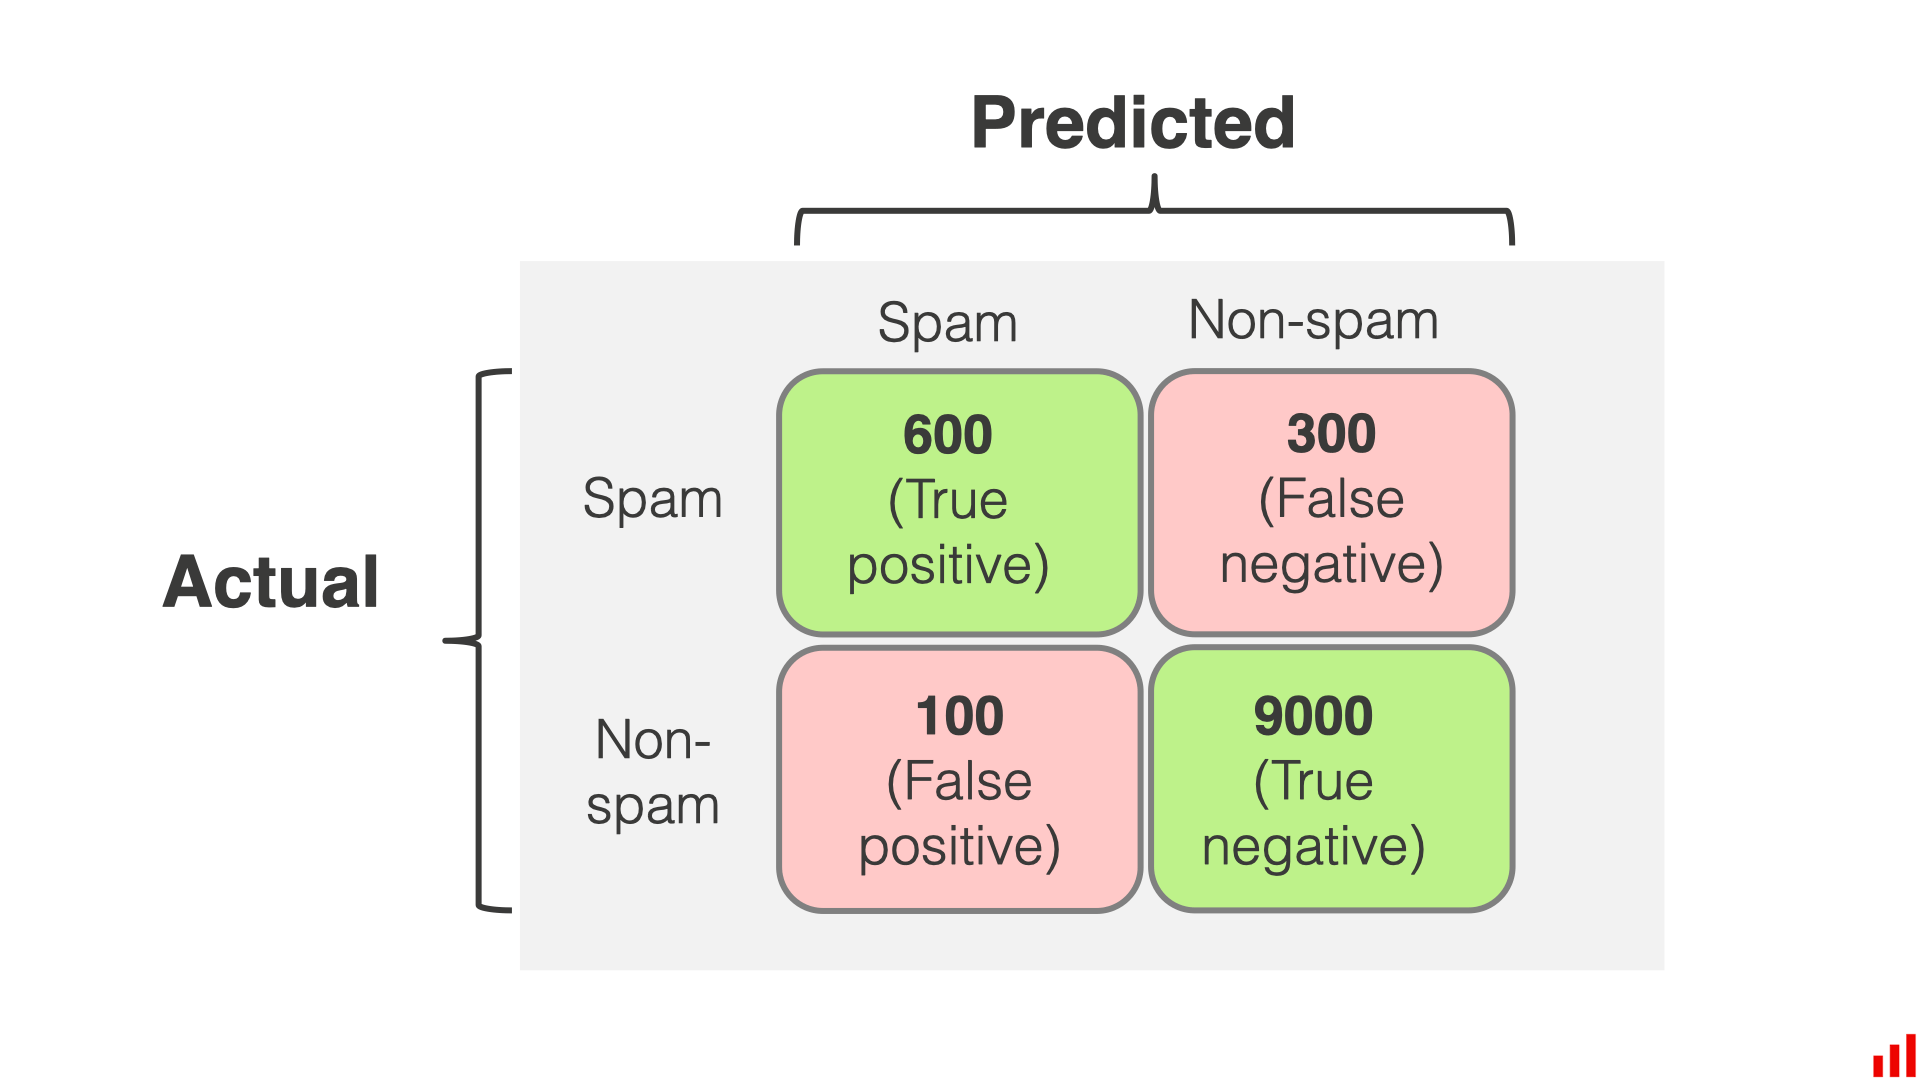

In [38]:
cm=confusion_matrix(y_test,y_pred)

In [39]:
print(cm)

[[25  4]
 [ 3 29]]


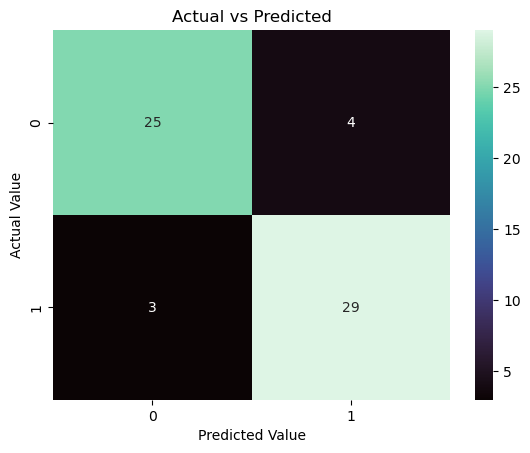

In [40]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [41]:
cm

array([[25,  4],
       [ 3, 29]])

In [42]:
cm.ravel()

array([25,  4,  3, 29])

In [43]:
TN,FP,FN,TP=cm.ravel()

In [44]:
precision_score(y_test,y_pred)

0.8787878787878788

In [45]:
ps=TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [46]:
acs=(TN+TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [47]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [48]:
#1=+ve,true
# 0=-ve,false

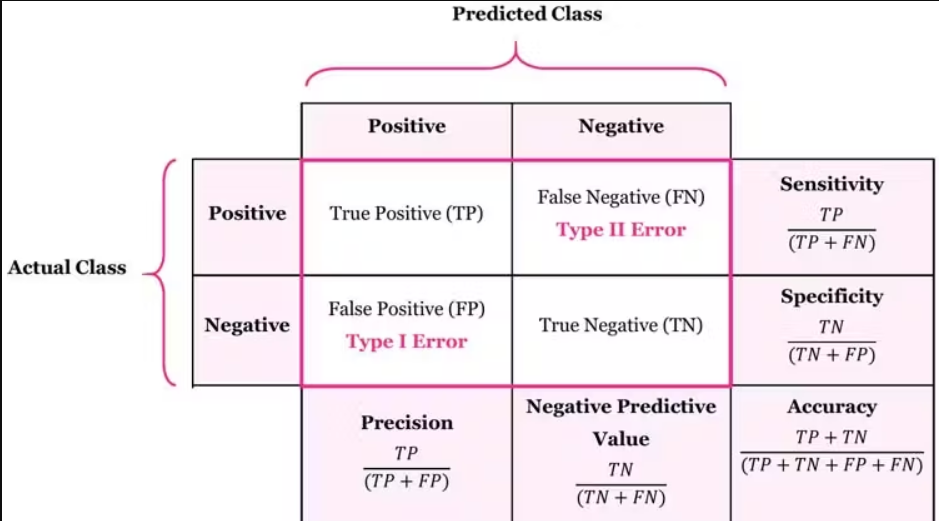

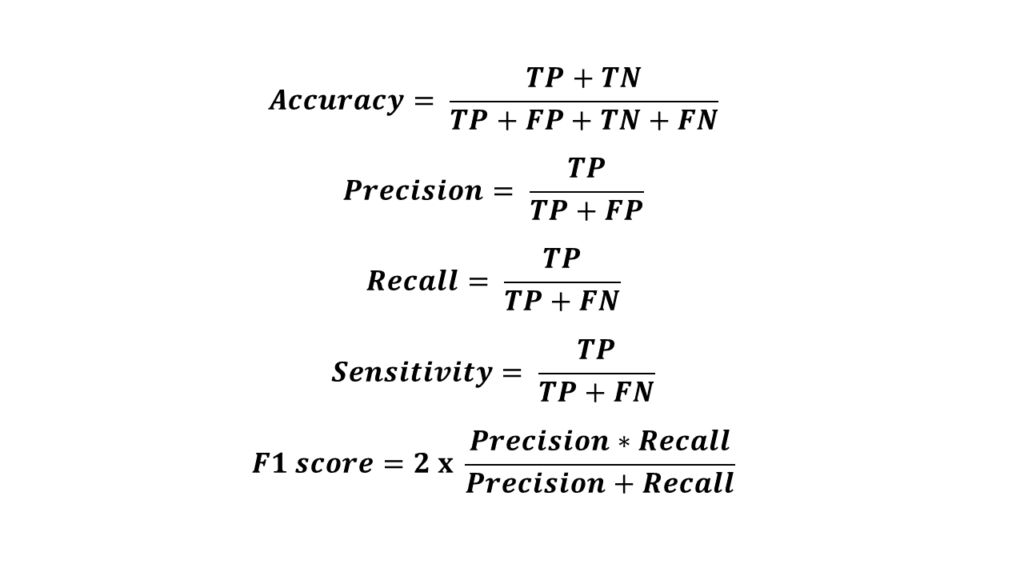

In [49]:
rs=recall_score(y_test,y_pred)
print('Recall Score is :',rs)

Recall Score is : 0.90625


In [50]:
#F1 Score to Evaluate both Precision and Recall Score 

In [51]:
f1_sc=f1_score(y_test,y_pred)

In [52]:
print('F1 Score:',f1_sc)

F1 Score: 0.8923076923076924


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###### 5.1.4: Checking Model Score

In [54]:
#Model Score same as Accuray Score
lr_score=model_lr.score(X_test,y_test)
lr_score

0.8852459016393442

### Step 5.2: Naive Bayes ML Model

In [55]:
#pre assumption : It will pre-assume No correlation b//w feature

######  Step 5.2.1: Import Naive Model

In [56]:
from sklearn.naive_bayes import GaussianNB

#GaussianNB only be use in case of binary classification 
#MultinomialNB:only be use in case of Multi class classification


model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning

GaussianNB()

In [57]:
y_pred=model_nv.predict(X_test)

In [58]:
nv_score=model_nv.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.8688524590163934


In [59]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.8688524590163934
Precision Score: 0.9
Recall Score: 0.84375
F1 Score: 0.8709677419354839


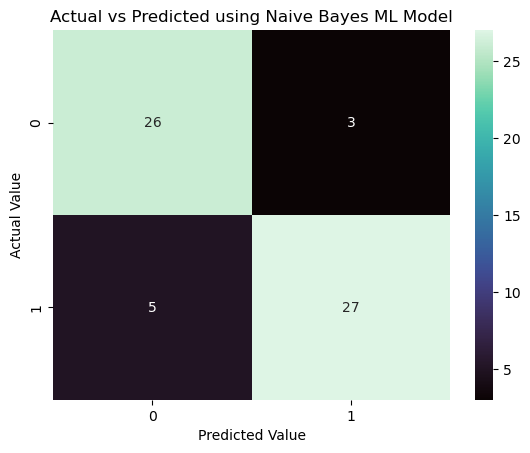

In [60]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [62]:
#Model1>Y_pred>scores>confusionMatrix>classification_report
#Model2>Y_pred>scores>confusionMatrix>classification_report
#Model3>Y_pred>scores>confusionMatrix>classification_report
#Model4>Y_pred>scores>confusionMatrix>classification_report
#Model5>Y_pred>scores>confusionMatrix>classification_report
#Model6>Y_pred>scores>confusionMatrix>classification_report
#Best  Model save :Error(Low),Accuray Score High
#Deploy


### Step 5.3: Support Vector Machine ML Model

In [63]:
#Support Vector Machine(SVM)

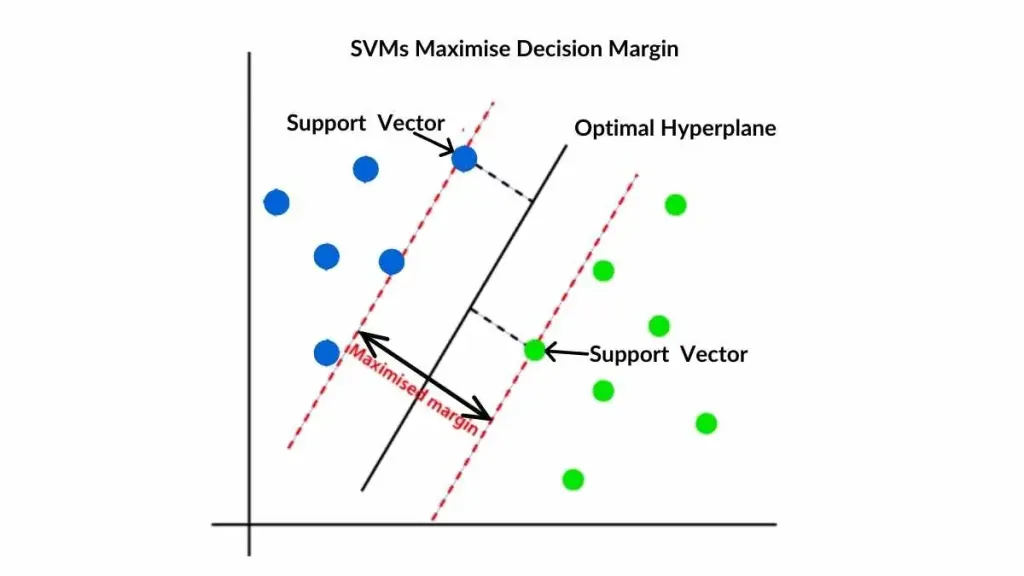

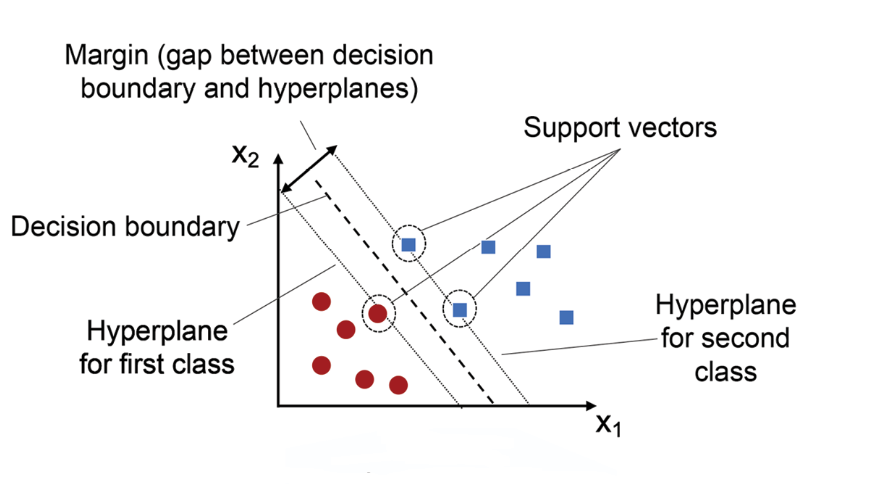

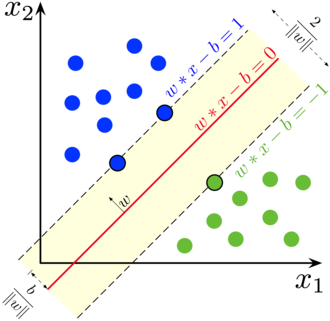

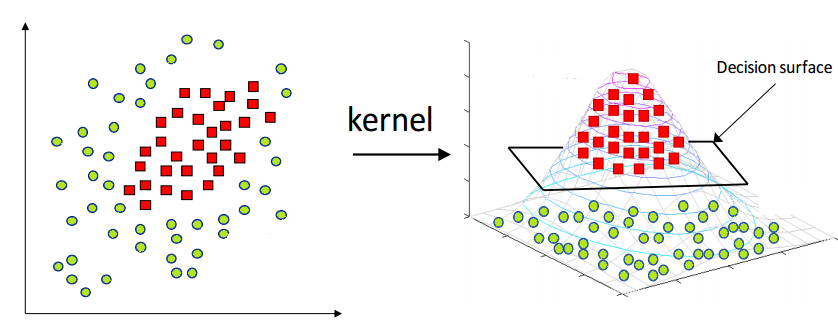

In [64]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

###### Step 5.3.1:Import SVM Module

In [65]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2: Predict X_test

In [66]:
y_pred=model_svc.predict(X_test)

###### Step 5.3.3: Checking Scores and Confusion Matrix

In [67]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.7049180327868853
Precision Score: 0.6666666666666666
Recall Score: 0.875
F1 Score: 0.7567567567567568


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



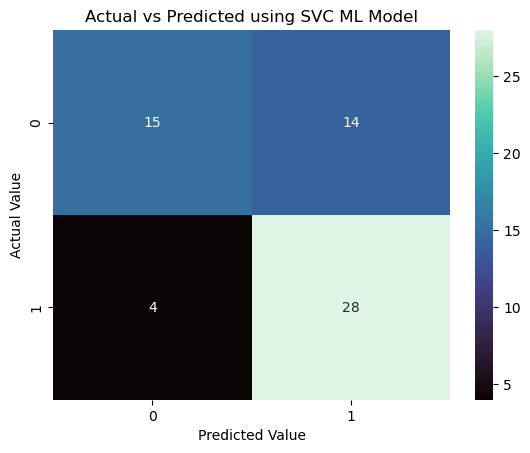

In [69]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [70]:
svm_score=accuracy_score(y_test,y_pred)

In [71]:
lr_score,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

In [72]:
model_svc.score(X_test,y_test)

0.7049180327868853

### Step 5.4: Decision Tree ML Model

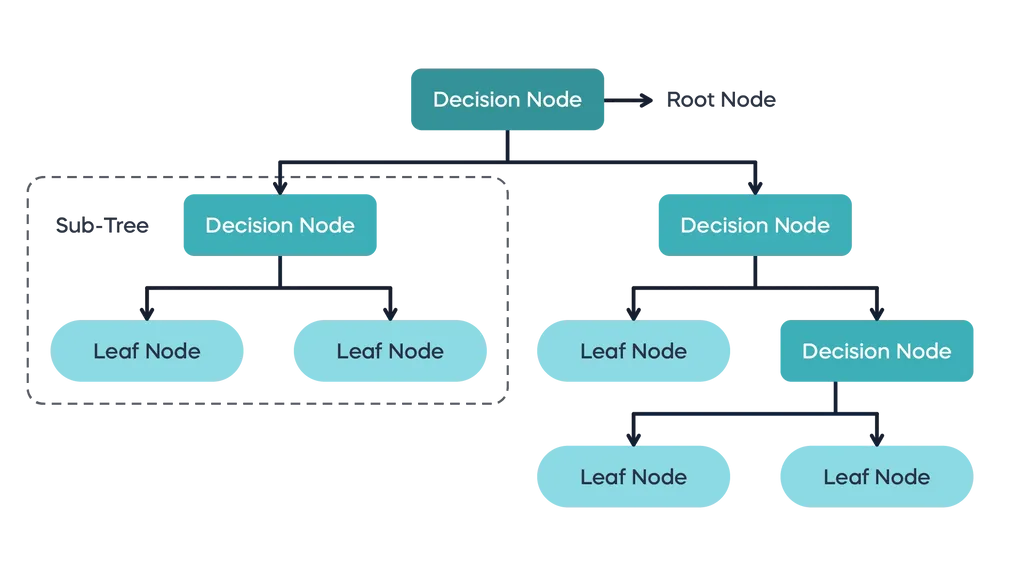

In [73]:
#For Example
#Info about Iris Flower:
#Sepal length
#Petal Width
#Sepal Length
#Petal Length

#Iris popular species
#Versicolor
#Setosa
#Virginica

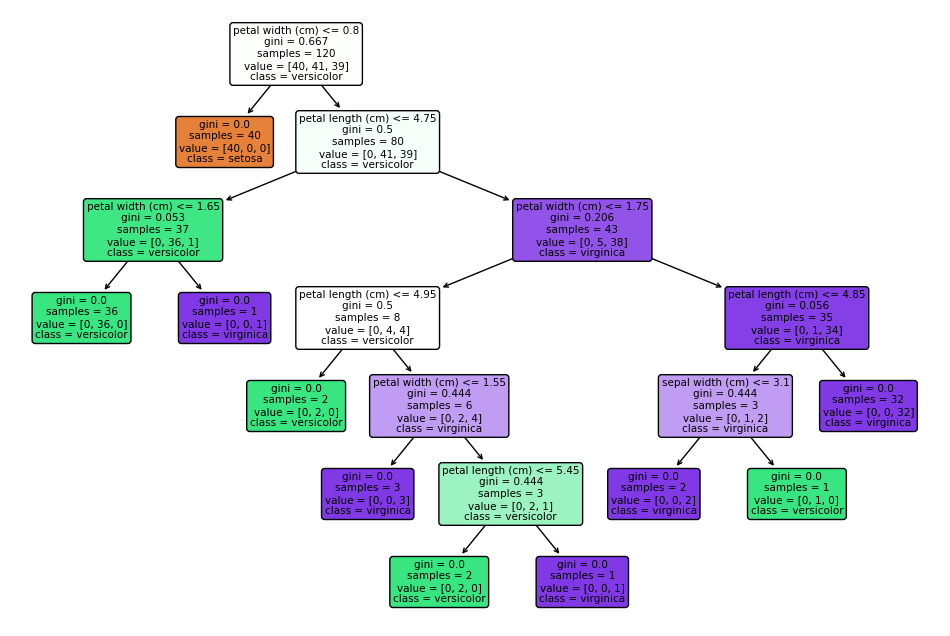

###### Step 5.4.1: Import Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step 5.4.2: Predict y_pred

In [76]:
y_pred= model_dt.predict(X_test)

In [77]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.8032786885245902
Precision Score: 0.8846153846153846
Recall Score: 0.71875
F1 Score: 0.7931034482758621


In [78]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [79]:
from sklearn.tree import plot_tree

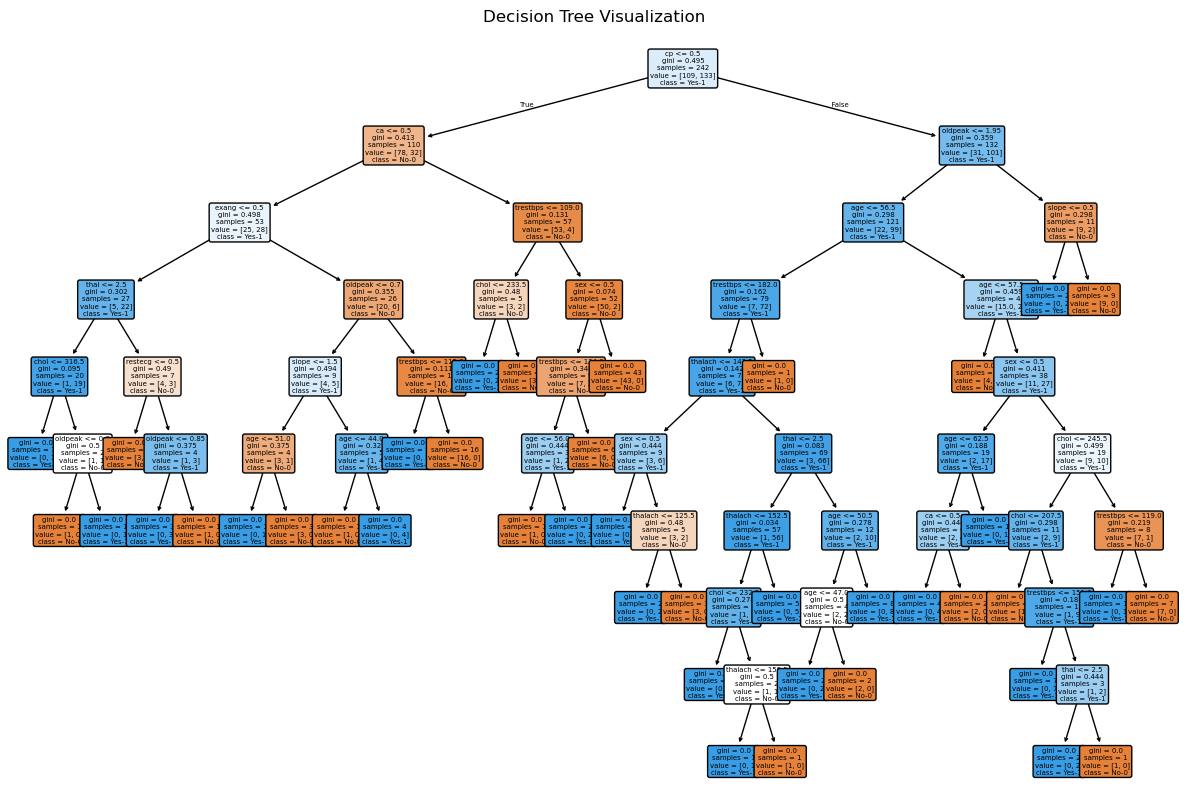

In [80]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

In [81]:
dt_score=accuracy_score(y_test,y_pred)
dt_score

0.8032786885245902

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



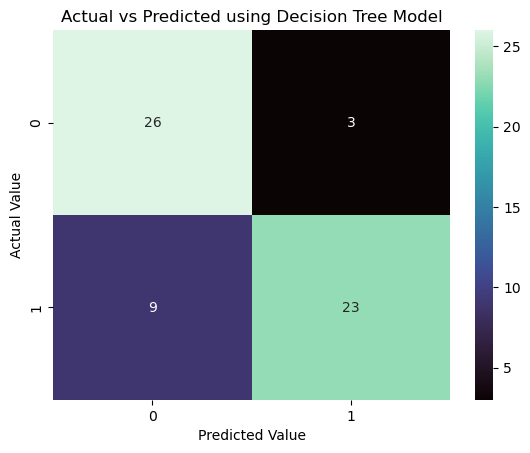

In [83]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Decision Tree Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of multiple ML Model and each model give it's prediction/classification, final outcome based on majority
- `Boosting Technique`: Next Model learn from previous model and boost it minimize error to improve score

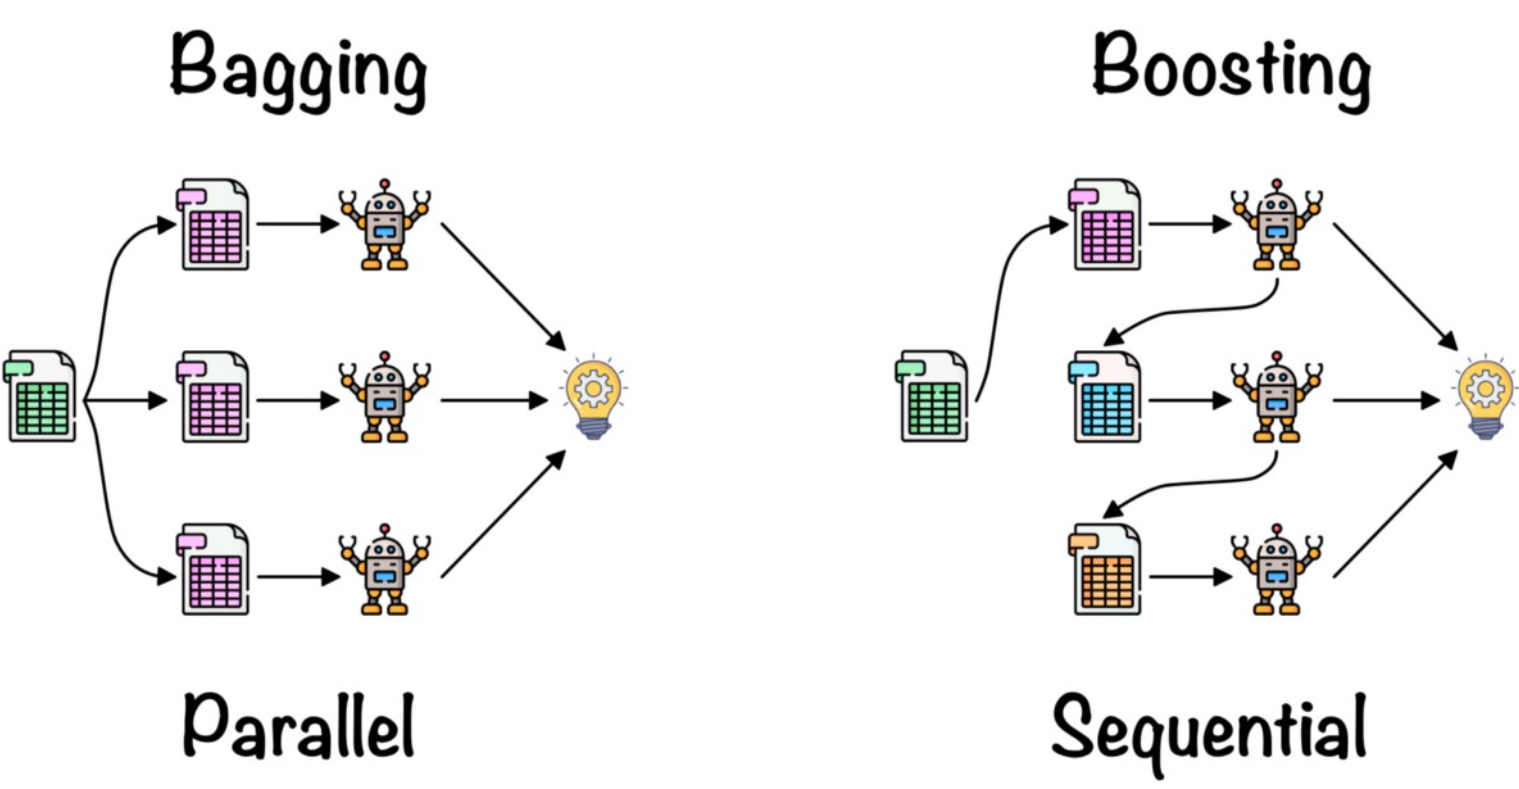

###### Step 5.5.1: Bagging Technique Model>> Random Forest ML Model

In [84]:
#Random Forest:Bags og multiple Decision Trees()
#Default Trees = 100
#Bagging Technique(Ensemble)

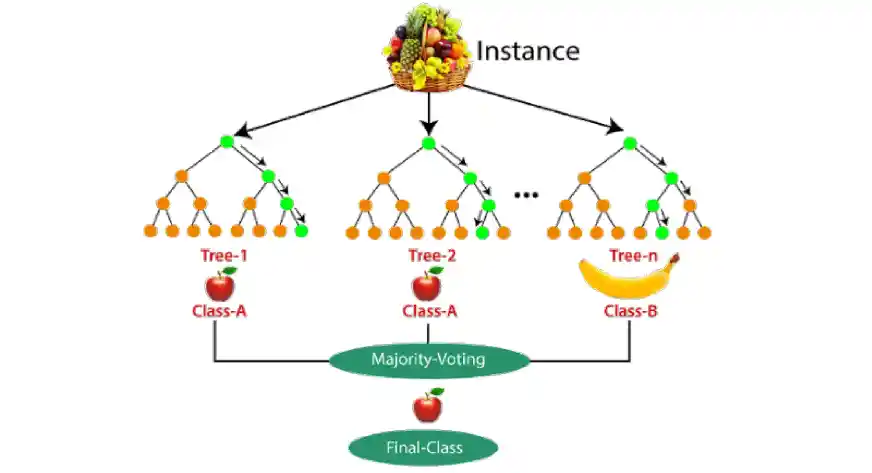

In [85]:
#2.2+2.4+2.6/3

In [86]:
#Random Forest Regression problem :Avg of Final value>>2.2+2.4+2.5>>2.36
#Random Forest Classification>>Binary/Multiclass Classification>>Majority Voting

###### Step 5.5.2: Import Random Forest Model 

In [87]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=200)#parameter change Default Tree 100 to 200
model_rf.fit(X_train,y_train)#Learning

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3: y_pred Prediction based on X_test

In [88]:
y_pred=model_rf.predict(X_test)

In [89]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.8524590163934426
Precision Score: 0.8484848484848485
Recall Score: 0.875
F1 Score: 0.8615384615384616


In [90]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8524590163934426

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



###### Step 5.5.4

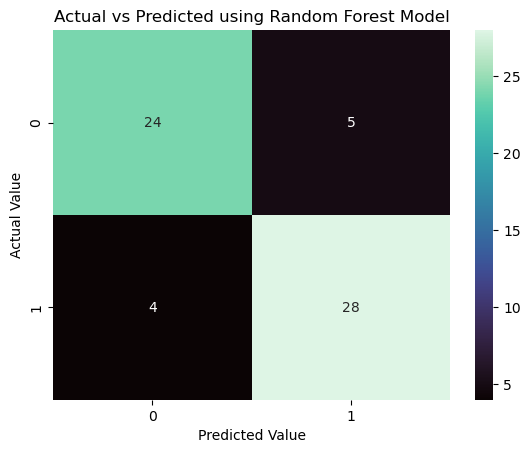

In [92]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Random Forest Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.6 Ensemble Boosting Technique: Adaboost, Gradientboost, XGboost
- Adaboost: Adaptive Boosting
- Gradientboost:GBM
- LBM:Gradientboost: LGBM(Light Gradient Bossting Model)
- XGBoost:Extreme Gradient Boosting:
- Catboost: Categorical : Texual Data

###### Gradientboost

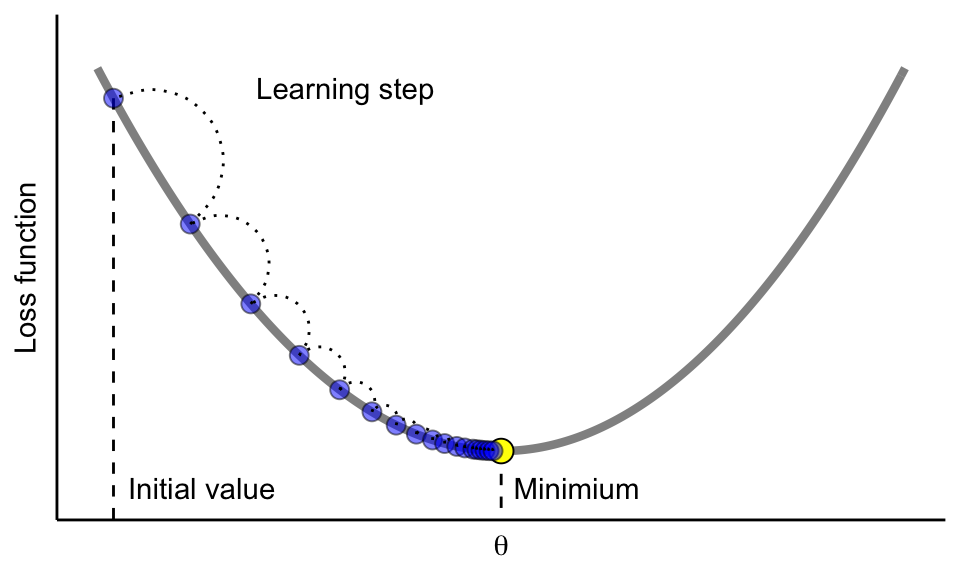

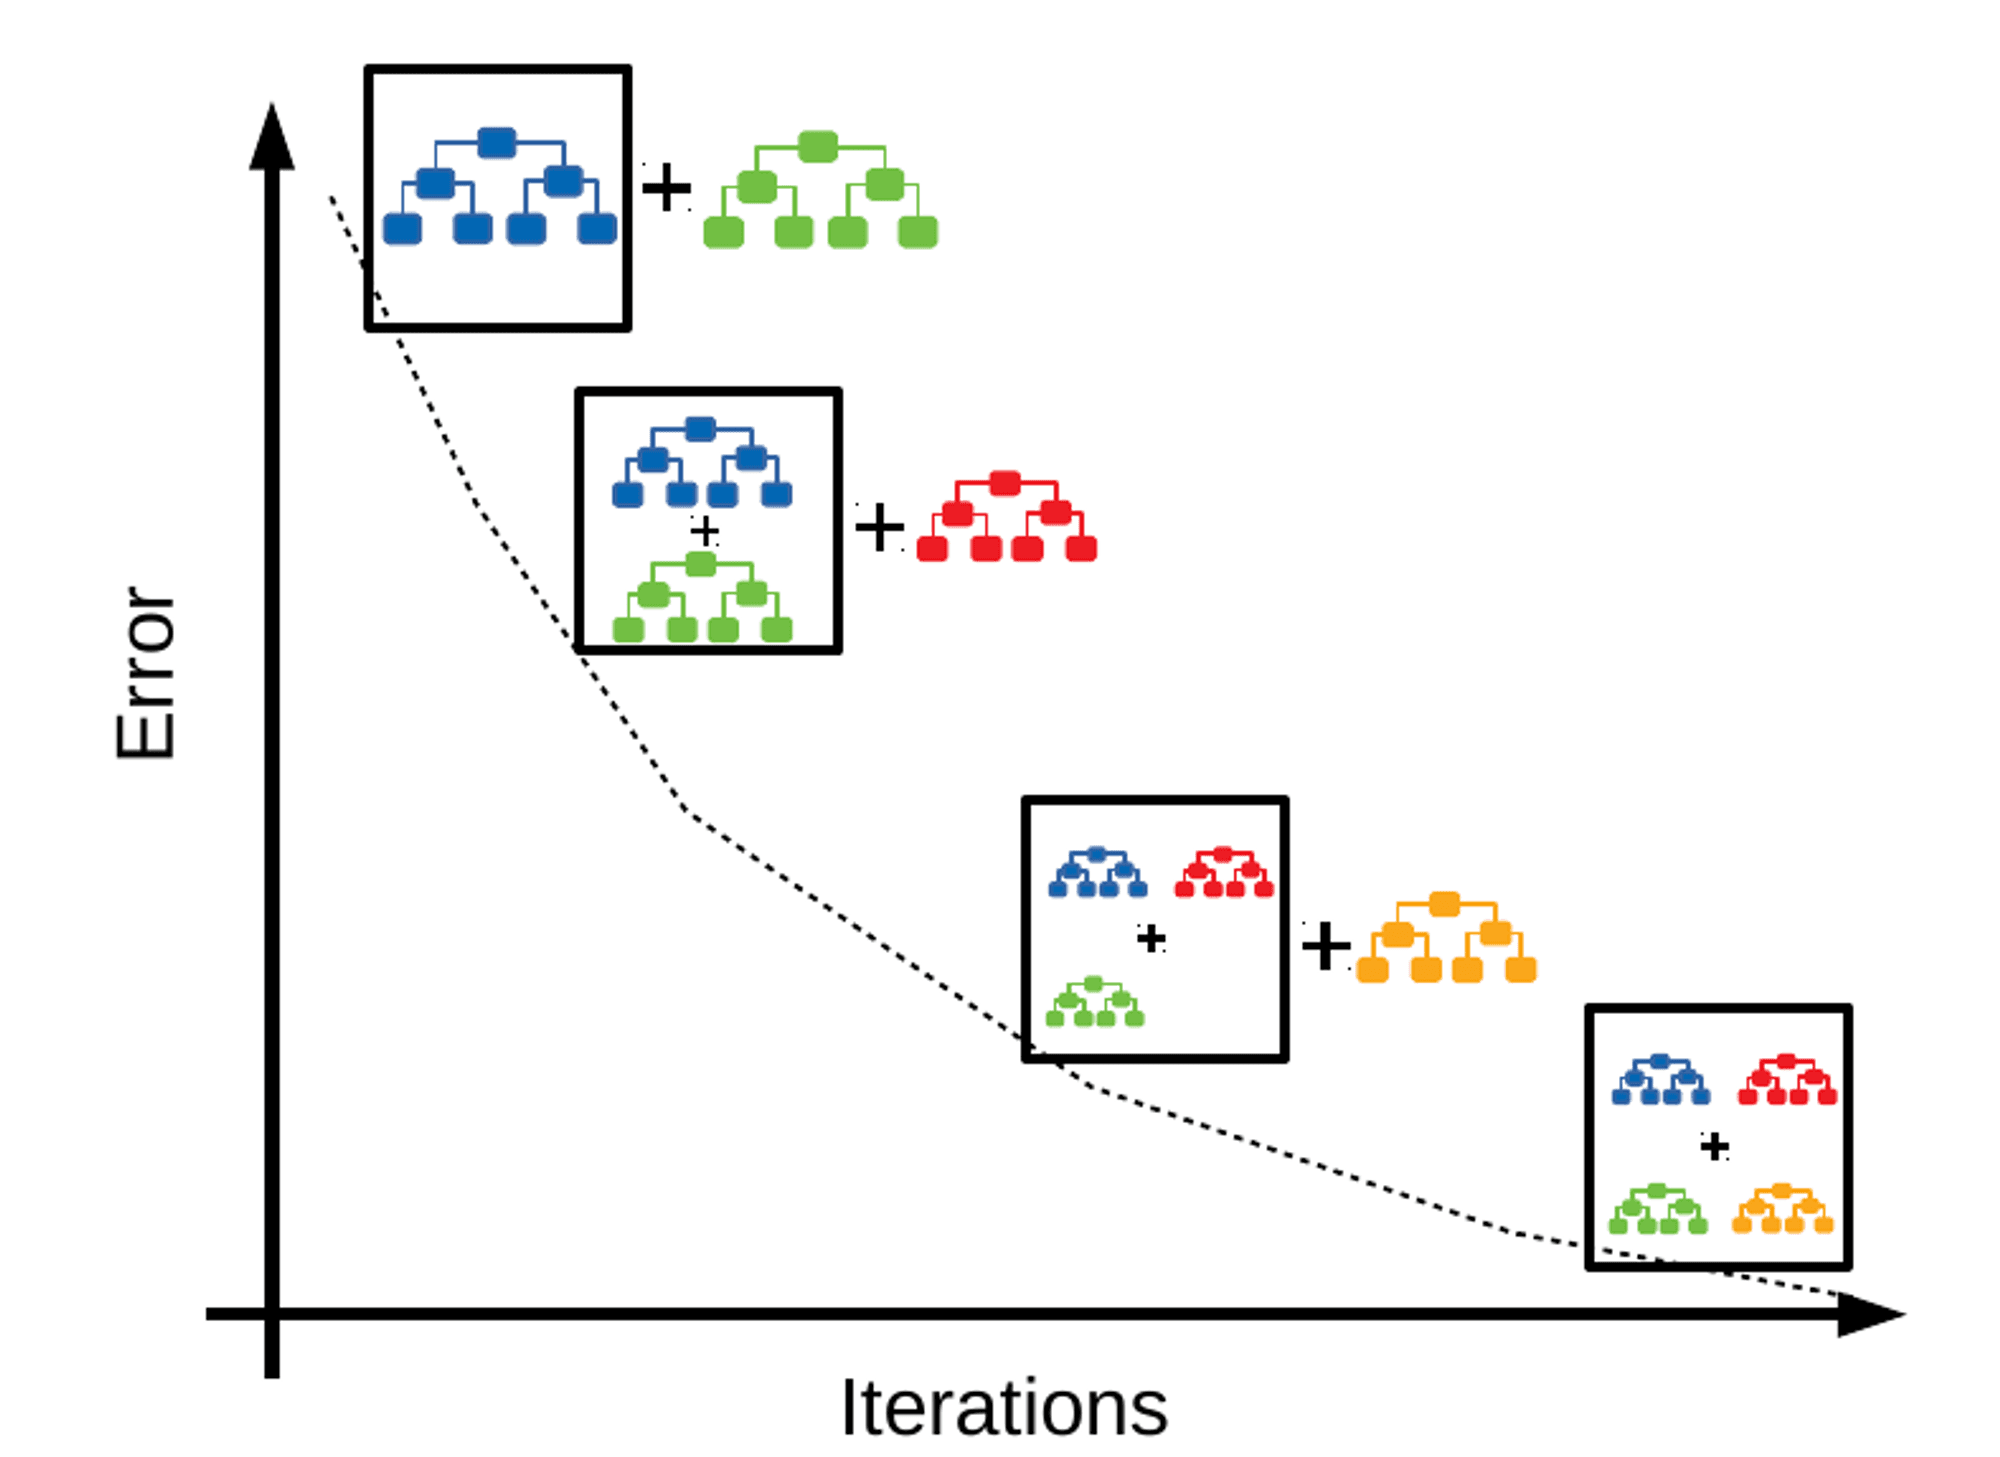

###### XGBoost:Extreme Gradient Boosting

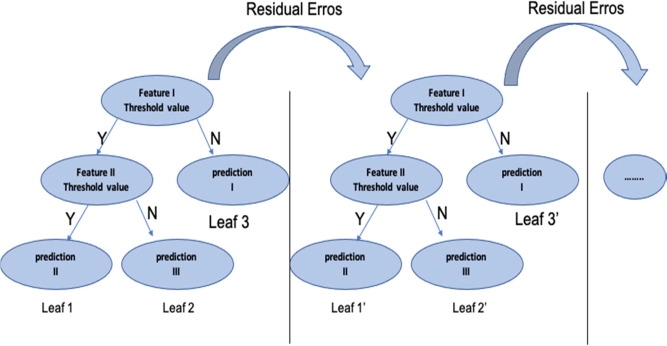

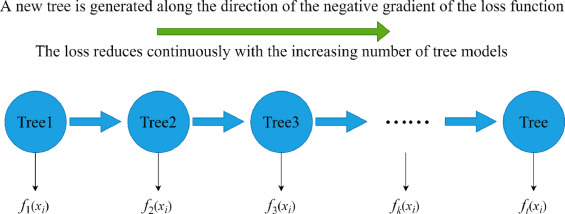

###### Step 5.6.1: Import XGboost ML Algorithm

In [123]:
#pip install xgboost

In [94]:
import xgboost
print('done')

done


In [95]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()#Hyperparameter : Models Fine Tune objective='binary:Logistic' , random_state=42, Learning_rate=0.001
model_xgb.fit(X_train,y_train)#NONE:Hyper Parameter: /Model Fine Tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [96]:
y_pred=model_xgb.predict(X_test)

In [97]:
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

### Step 5.7: KNN: Regression and Classification

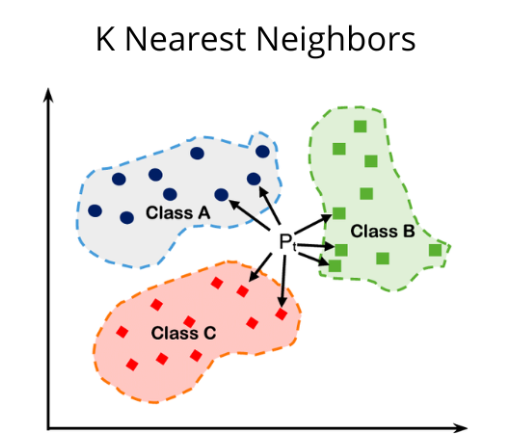

###### Step 5.7.1: Import KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model_knn= KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [100]:
y_pred=model_knn.predict(X_test)

In [101]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



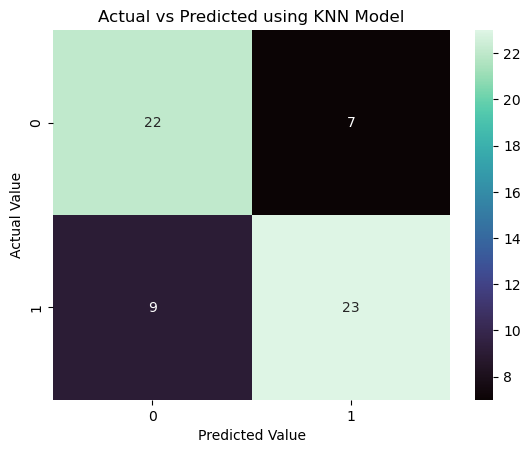

In [103]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.8: Artificial Neural Network using Deep Learning

In [104]:
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

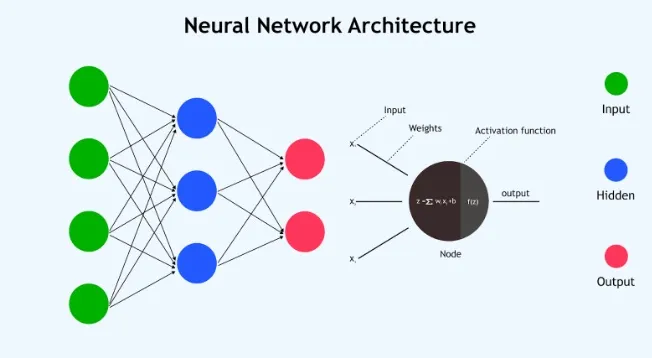

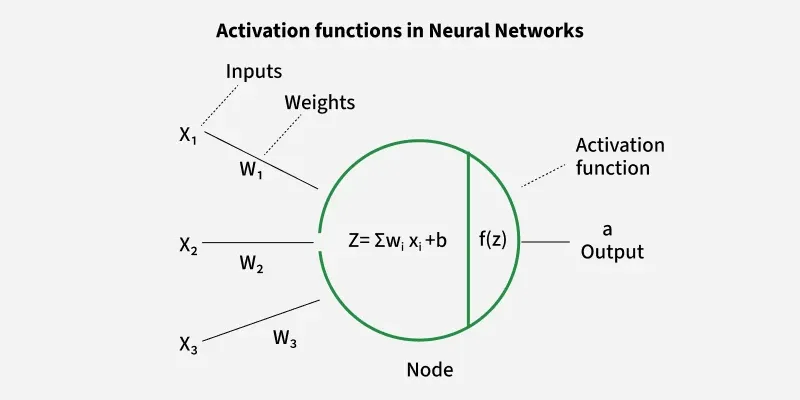

In [105]:
 #keras tensor flow:
#tensors :array

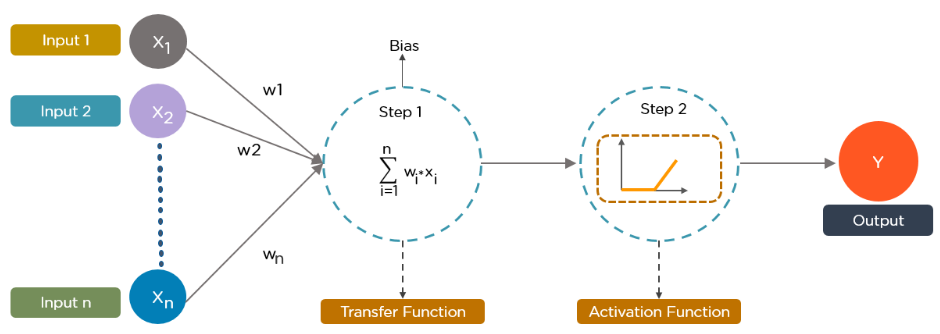

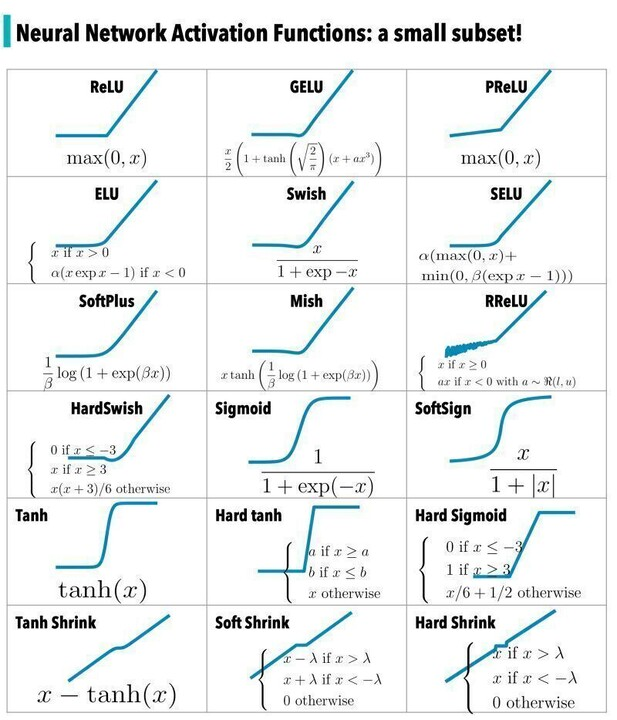

In [121]:
#pip install keras

In [120]:
#pip install tensorflow

###### Step 5.8.1: ANN Model Creation

In [108]:
from keras.models import Sequential
from keras.layers import Dense

###### Step 5.8.2: Model Building

In [109]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=13))#Dense 1
model.add(Dense(1,activation='sigmoid'))#output will be Nueron for binary 
model.compile(loss='binary_crossentropy',#loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])# metrics return accuracy score
print('done')

done


###### Step 5.8.3: Model Training

In [110]:
model.fit(X_train,y_train,epochs=300)#iteration during retraining epochs=300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4504 - loss: 29.6476
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4545 - loss: 17.5451  
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5413 - loss: 7.6344 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6033 - loss: 5.2477 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6116 - loss: 5.9854 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5950 - loss: 5.6467  
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5950 - loss: 5.0892 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6281 - loss: 4.9862
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6240 - loss: 4.9368 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6157 - loss: 4.8036 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6157 - loss: 4.7266 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6157 - 

###### Step 5.8.4: pred y_value

In [111]:
y_pred=model.predict(X_test)
y_pred=[round(i[0])for i in y_pred ]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [112]:
ann_score=accuracy_score(y_test,y_pred)
ann_score

0.8524590163934426

### Step 6: All Model Comparison

In [113]:
all_model_score=[lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]

model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


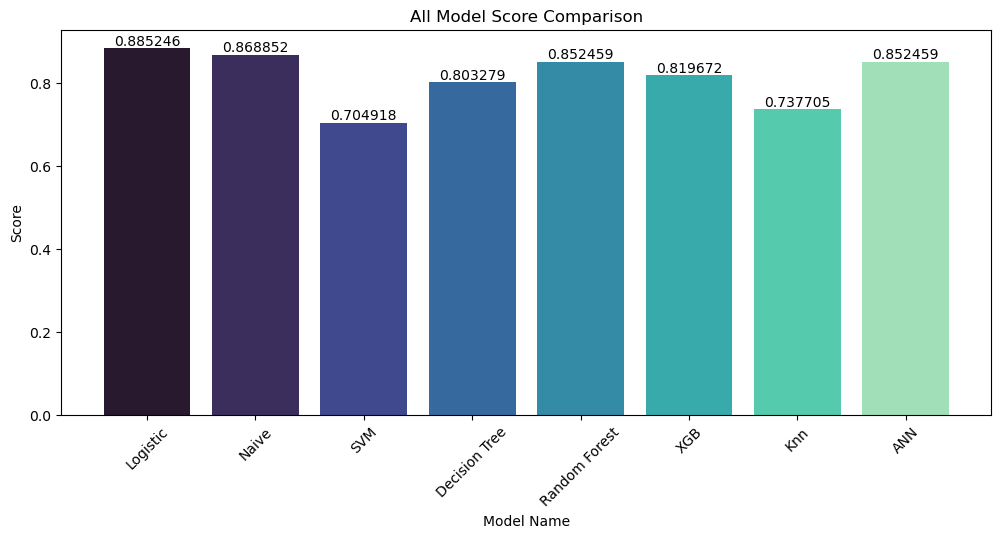

In [114]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Step 7: Best Model Save

In [115]:
#lr has Highest Score so the Final Model is Logistic Regression

In [116]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('done')

done


In [117]:
import os
cr=os.getcwd()
print(cr)

C:\Users\pankh\Heart Disease Prediction


In [124]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
